IMPORT MODULE

In [36]:
import pandas as pd
import numpy as npt
import seaborn as sns
from matplotlib import pyplot as plt
import statistics as stat
from scipy.stats import shapiro
import plotly.graph_objs as go
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.sandbox.stats.runs import runstest_1samp

STORE DATA

In [37]:
#INFLASI UMUM
df_inflasi = pd.read_csv('./fix_dataset/Data Inflasi 2003 - 2022.csv')
df_inflasi_2023 = pd.read_csv('./fix_dataset/Data Inflasi 2023.csv')
#INFLASI PENDIDIKAN
df_ip_pendidikan_2020 = pd.read_csv('./fix_dataset/dataset_InflasiPendidikan/Inflasi Pendidikan 2020-Pendidikan.csv', header=[0], index_col=[0])
df_ip_pendidikan_2021 = pd.read_csv('./fix_dataset/dataset_InflasiPendidikan/Inflasi Pendidikan 2021-Pendidikan.csv', header=[0], index_col=[0])
df_ip_pendidikan_2022 = pd.read_csv('./fix_dataset/dataset_InflasiPendidikan/Inflasi Pendidikan 2022-Pendidikan.csv', header=[0], index_col=[0])
df_ip_pendidikan_2023 = pd.read_csv('./fix_dataset/dataset_InflasiPendidikan/Inflasi Pendidikan 2023-Pendidikan.csv', header=[0], index_col=[0])

df_ip_menengah_2020 = pd.read_csv('./fix_dataset/dataset_InflasiPendidikan/Inflasi Pendidikan 2020-Menengah.csv', header=[0], index_col=[0])
df_ip_menengah_2021 = pd.read_csv('./fix_dataset/dataset_InflasiPendidikan/Inflasi Pendidikan 2021-Menengah.csv', header=[0], index_col=[0])
df_ip_menengah_2022 = pd.read_csv('./fix_dataset/dataset_InflasiPendidikan/Inflasi Pendidikan 2022-Menengah.csv', header=[0], index_col=[0])
df_ip_menengah_2023 = pd.read_csv('./fix_dataset/dataset_InflasiPendidikan/Inflasi Pendidikan 2023-Menengah.csv', header=[0], index_col=[0])

df_ip_tinggi_2020 = pd.read_csv('./fix_dataset/dataset_InflasiPendidikan/Inflasi Pendidikan 2020-Tinggi.csv', header=[0], index_col=[0])
df_ip_tinggi_2021 = pd.read_csv('./fix_dataset/dataset_InflasiPendidikan/Inflasi Pendidikan 2021-Tinggi.csv', header=[0], index_col=[0])
df_ip_tinggi_2022 = pd.read_csv('./fix_dataset/dataset_InflasiPendidikan/Inflasi Pendidikan 2022-Tinggi.csv', header=[0], index_col=[0])
df_ip_tinggi_2023 = pd.read_csv('./fix_dataset/dataset_InflasiPendidikan/Inflasi Pendidikan 2023-Tinggi.csv', header=[0], index_col=[0])

df_ip_lainnya_2020 = pd.read_csv('./fix_dataset/dataset_InflasiPendidikan/Inflasi Pendidikan 2020-Lainnya.csv', header=[0], index_col=[0])
df_ip_lainnya_2021 = pd.read_csv('./fix_dataset/dataset_InflasiPendidikan/Inflasi Pendidikan 2021-Lainnya.csv', header=[0], index_col=[0])
df_ip_lainnya_2022 = pd.read_csv('./fix_dataset/dataset_InflasiPendidikan/Inflasi Pendidikan 2022-Lainnya.csv', header=[0], index_col=[0])
df_ip_lainnya_2023 = pd.read_csv('./fix_dataset/dataset_InflasiPendidikan/Inflasi Pendidikan 2023-Lainnya.csv', header=[0], index_col=[0])



In [38]:

# #INFLASI TAHUN KALENDER PENDIDIKAN
# df_tp_kurpel_2014 = pd.read_csv('./fix_dataset/dataset-InflasiTahunPendidikan/Inflasi Tahun Pendidikan 2014-Kursus-Kepelatihan.csv')
# df_tp_pendidikan_2014 = pd.read_csv('./fix_dataset/dataset-InflasiTahunPendidikan/Inflasi Tahun Pendidikan 2014-Pendidikan.csv')
# df_tp_perlengkapan_2014 = pd.read_csv('./fix_dataset/dataset-InflasiTahunPendidikan/Inflasi Tahun Pendidikan 2014-Perlengkapan.csv')

# df_tp_kurpel_2015 = pd.read_csv('./fix_dataset/dataset-InflasiTahunPendidikan/Inflasi Tahun Pendidikan 2015-Kursus-Kepelatihan.csv')
# df_tp_pendidikan_2015 = pd.read_csv('./fix_dataset/dataset-InflasiTahunPendidikan/Inflasi Tahun Pendidikan 2015-Pendidikan.csv')
# df_tp_perlengkapan_2015 = pd.read_csv('./fix_dataset/dataset-InflasiTahunPendidikan/Inflasi Tahun Pendidikan 2015-Perlengkapan.csv')

# df_tp_kurpel_2016 = pd.read_csv('./fix_dataset/dataset-InflasiTahunPendidikan/Inflasi Tahun Pendidikan 2016-Kursus-Kepelatihan.csv')
# df_tp_pendidikan_2016 = pd.read_csv('./fix_dataset/dataset-InflasiTahunPendidikan/Inflasi Tahun Pendidikan 2016-Pendidikan.csv')
# df_tp_perlengkapan_2016 = pd.read_csv('./fix_dataset/dataset-InflasiTahunPendidikan/Inflasi Tahun Pendidikan 2016-Perlengkapan.csv')

# df_tp_kurpel_2017 = pd.read_csv('./fix_dataset/dataset-InflasiTahunPendidikan/Inflasi Tahun Pendidikan 2017-Kursus-Kepelatihan.csv')
# df_tp_pendidikan_2017 = pd.read_csv('./fix_dataset/dataset-InflasiTahunPendidikan/Inflasi Tahun Pendidikan 2017-Pendidikan.csv')
# df_tp_perlengkapan_2017 = pd.read_csv('./fix_dataset/dataset-InflasiTahunPendidikan/Inflasi Tahun Pendidikan 2017-Perlengkapan.csv')

# df_tp_kurpel_2018 = pd.read_csv('./fix_dataset/dataset-InflasiTahunPendidikan/Inflasi Tahun Pendidikan 2018-Kursus-Kepelatihan.csv')
# df_tp_pendidikan_2018 = pd.read_csv('./fix_dataset/dataset-InflasiTahunPendidikan/Inflasi Tahun Pendidikan 2018-Pendidikan.csv')
# df_tp_perlengkapan_2018 = pd.read_csv('./fix_dataset/dataset-InflasiTahunPendidikan/Inflasi Tahun Pendidikan 2018-Perlengkapan.csv')

# df_tp_kurpel_2019 = pd.read_csv('./fix_dataset/dataset-InflasiTahunPendidikan/Inflasi Tahun Pendidikan 2019-Kursus-Kepelatihan.csv')
# df_tp_pendidikan_2019 = pd.read_csv('./fix_dataset/dataset-InflasiTahunPendidikan/Inflasi Tahun Pendidikan 2019-Pendidikan.csv')
# df_tp_perlengkapan_2019 = pd.read_csv('./fix_dataset/dataset-InflasiTahunPendidikan/Inflasi Tahun Pendidikan 2019-Perlengkapan.csv')

# DATA CLEANING

* DATA INFLASI UMUM

In [39]:
df_inflasi.head()

,Month,Inflasi
0,12/01/2022,5.51 %
1,11/01/2022,5.42 %
2,10/01/2022,5.71 %
3,09/01/2022,5.95 %
4,08/01/2022,4.69 %


In [40]:
#Clean data, object->date and float
df_inflasi["Inflasi"] = df_inflasi["Inflasi"].str.replace(" %", "")
df_inflasi["Inflasi"] = pd.to_numeric(df_inflasi["Inflasi"], errors="coerce")
df_inflasi['Inflasi'] = df_inflasi['Inflasi'] * 0.01

In [41]:
df_inflasi['Month'] = pd.to_datetime(df_inflasi['Month'], format='%m/%d/%Y')

In [42]:
df_inflasi

,Month,Inflasi
0,2022-12-01,0.0551
1,2022-11-01,0.0542
2,2022-10-01,0.0571
3,2022-09-01,0.0595
4,2022-08-01,0.0469
...,...,...
235,2003-05-01,0.0715
236,2003-04-01,0.0762
237,2003-03-01,0.0717
238,2003-02-01,0.0760


In [43]:
df_inflasi_2023.head()

,Month,Inflasi
0,12/01/2023,2.61 %
1,11/01/2023,2.86 %
2,10/01/2023,2.56 %
3,09/01/2023,2.28 %
4,08/01/2023,3.27 %


In [44]:
#Clean data, object->date and float
df_inflasi_2023["Inflasi"] = df_inflasi_2023["Inflasi"].str.replace(" %", "")
df_inflasi_2023["Inflasi"] = pd.to_numeric(df_inflasi_2023["Inflasi"], errors="coerce")
df_inflasi_2023['Inflasi'] = df_inflasi_2023['Inflasi'] * 0.01

In [45]:
df_inflasi_2023['Month'] = pd.to_datetime(df_inflasi_2023['Month'], format='%m/%d/%Y')

In [46]:
df_inflasi_2023

,Month,Inflasi
0,2023-12-01,0.0261
1,2023-11-01,0.0286
2,2023-10-01,0.0256
3,2023-09-01,0.0228
4,2023-08-01,0.0327
5,2023-07-01,0.0308
6,2023-06-01,0.0352
7,2023-05-01,0.0400
8,2023-04-01,0.0433
9,2023-03-01,0.0497


In [47]:
print('Data Inflasi Umum 2003-2022:\n',df_inflasi.dtypes)
print('Data Inflasi Umum 2023:\n',df_inflasi_2023.dtypes)

Data Inflasi Umum 2003-2022:
 Month      datetime64[ns]
Inflasi           float64
dtype: object
Data Inflasi Umum 2023:
 Month      datetime64[ns]
Inflasi           float64
dtype: object


* DATA INFLASI PENDIDIKAN [PENDIDIKAN]

In [48]:
print('NAN Data:\n',df_ip_pendidikan_2020.isna().sum())
print('Type Data:\n',df_ip_pendidikan_2020.dtypes)

NAN Data:
 01/01/2020    0
01/02/2020    0
01/03/2020    0
01/04/2020    0
01/05/2020    0
01/06/2020    0
01/07/2020    0
01/08/2020    0
01/09/2020    0
01/10/2020    0
01/11/2020    0
01/12/2020    0
dtype: int64
Type Data:
 01/01/2020    float64
01/02/2020    float64
01/03/2020    float64
01/04/2020    float64
01/05/2020    float64
01/06/2020    float64
01/07/2020    float64
01/08/2020    float64
01/09/2020    float64
01/10/2020    float64
01/11/2020    float64
01/12/2020    float64
dtype: object


In [49]:
print('NAN Data:\n',df_ip_pendidikan_2021.isna().sum())
print('Type Data:\n',df_ip_pendidikan_2021.dtypes)

NAN Data:
 01/01/2021    0
01/02/2021    0
01/03/2021    0
01/04/2021    0
01/05/2021    0
01/06/2021    0
01/07/2021    0
01/08/2021    0
01/09/2021    0
01/10/2021    0
01/11/2021    0
01/12/2021    0
dtype: int64
Type Data:
 01/01/2021    float64
01/02/2021    float64
01/03/2021    float64
01/04/2021    float64
01/05/2021    float64
01/06/2021    float64
01/07/2021    float64
01/08/2021    float64
01/09/2021    float64
01/10/2021    float64
01/11/2021    float64
01/12/2021    float64
dtype: object


In [50]:
df_1 = df_ip_pendidikan_2020
df_1.head(91)

,01/01/2020,01/02/2020,01/03/2020,01/04/2020,01/05/2020,01/06/2020,01/07/2020,01/08/2020,01/09/2020,01/10/2020,01/11/2020,01/12/2020
Kota,,,,,,,,,,,,
KOTA MEULABOH,0.00,0.00,0.00,0.0,0.0,0.0,1.01,0.00,0.00,0.00,0.00,0.0
KOTA BANDA ACEH,0.03,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.76,0.00,0.00,0.0
KOTA LHOKSEUMAWE,0.00,0.00,0.00,0.0,0.0,0.0,0.07,0.00,5.75,0.00,0.00,0.0
KOTA SIBOLGA,2.58,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0
KOTA PEMATANG SIANTAR,0.00,0.00,0.00,0.0,0.0,0.0,0.00,3.12,0.00,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
KOTA SORONG,0.00,0.00,0.00,0.0,0.0,0.0,0.68,0.23,0.07,0.00,0.00,0.0
MERAUKE,0.00,0.00,0.45,0.0,0.0,0.0,0.58,0.00,0.00,0.00,0.00,0.0
TIMIKA,0.00,0.00,0.00,0.0,0.0,0.0,0.00,2.49,0.00,0.00,0.00,0.0


* DATA INFLASI PENDIDIKAN
- Melakukan cleaning data inflasi pendidikan
- Melakukan transpose data untuk menjadikan kota sebagai features
- Menggabungkan data inflasi pendidikan pertahun dan per kategori

In [51]:

# df_ip_pendidikan_2020.index = pd.to_datetime(df_ip_pendidikan_2020.index).strftime("%B %Y")
df = df_ip_pendidikan_2020

df.head(91)

,01/01/2020,01/02/2020,01/03/2020,01/04/2020,01/05/2020,01/06/2020,01/07/2020,01/08/2020,01/09/2020,01/10/2020,01/11/2020,01/12/2020
Kota,,,,,,,,,,,,
KOTA MEULABOH,0.00,0.00,0.00,0.0,0.0,0.0,1.01,0.00,0.00,0.00,0.00,0.0
KOTA BANDA ACEH,0.03,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.76,0.00,0.00,0.0
KOTA LHOKSEUMAWE,0.00,0.00,0.00,0.0,0.0,0.0,0.07,0.00,5.75,0.00,0.00,0.0
KOTA SIBOLGA,2.58,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0
KOTA PEMATANG SIANTAR,0.00,0.00,0.00,0.0,0.0,0.0,0.00,3.12,0.00,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
KOTA SORONG,0.00,0.00,0.00,0.0,0.0,0.0,0.68,0.23,0.07,0.00,0.00,0.0
MERAUKE,0.00,0.00,0.45,0.0,0.0,0.0,0.58,0.00,0.00,0.00,0.00,0.0
TIMIKA,0.00,0.00,0.00,0.0,0.0,0.0,0.00,2.49,0.00,0.00,0.00,0.0


In [52]:
# df = df.transpose()
# df['Kota'] = pd.to_datetime(df['Kota'], format='%m/%d/%Y')
# df = df.drop(columns=['01/01/2020'])
# df.columns = df.columns.strftime("%B %Y")
# df.columns
# df = df.drop(3, axis=0, inplace=False)
# df.dtypes

# df.reset_index(inplace=True)
# df = df.drop(columns='index')

# df = df.drop(columns=['01-01-2020'])
# df =df.set_index('Kota')
# df = df.drop(index=['Kota'])


df

,01/01/2020,01/02/2020,01/03/2020,01/04/2020,01/05/2020,01/06/2020,01/07/2020,01/08/2020,01/09/2020,01/10/2020,01/11/2020,01/12/2020
Kota,,,,,,,,,,,,
KOTA MEULABOH,0.00,0.00,0.00,0.0,0.0,0.0,1.01,0.00,0.00,0.00,0.00,0.0
KOTA BANDA ACEH,0.03,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.76,0.00,0.00,0.0
KOTA LHOKSEUMAWE,0.00,0.00,0.00,0.0,0.0,0.0,0.07,0.00,5.75,0.00,0.00,0.0
KOTA SIBOLGA,2.58,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0
KOTA PEMATANG SIANTAR,0.00,0.00,0.00,0.0,0.0,0.0,0.00,3.12,0.00,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
KOTA SORONG,0.00,0.00,0.00,0.0,0.0,0.0,0.68,0.23,0.07,0.00,0.00,0.0
MERAUKE,0.00,0.00,0.45,0.0,0.0,0.0,0.58,0.00,0.00,0.00,0.00,0.0
TIMIKA,0.00,0.00,0.00,0.0,0.0,0.0,0.00,2.49,0.00,0.00,0.00,0.0


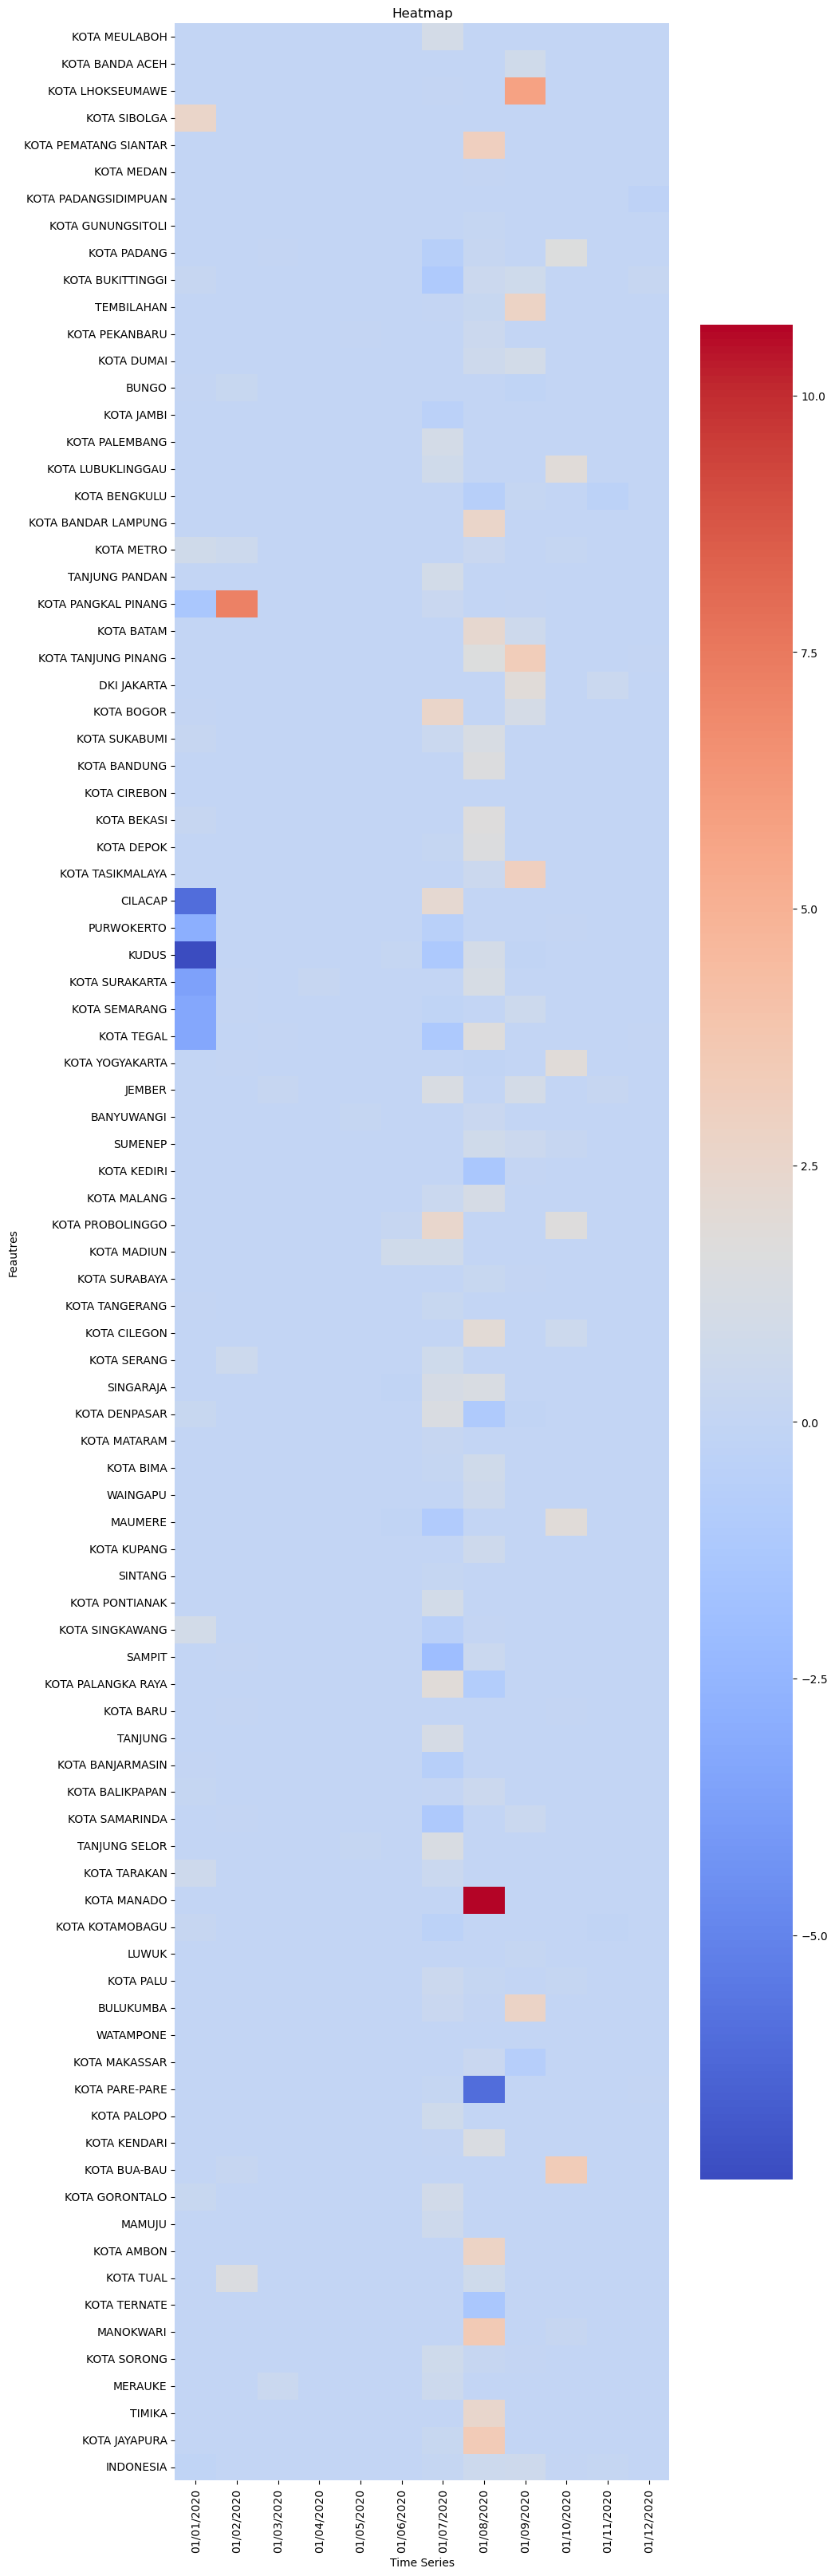

In [53]:
plt.figure(figsize=(10, 40))
sns.heatmap(df, annot=False, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap')
plt.xlabel('Time Series')
plt.ylabel('Feautres')
plt.show()


In [54]:
# pd_ip_20 = pd.merge(df_ip_pendidikan_2020, df_ip_pendidikan_2021, left_on='Kota', right_on='Kota')
# pd_ip_20 = pd_ip_20.rename(columns=lambda x: x.replace('_x', '').replace('_y', ''))
# pd_ip_20

,01/01/2020,01/02/2020,01/03/2020,01/04/2020,01/05/2020,01/06/2020,01/07/2020,01/08/2020,01/09/2020,01/10/2020,...,01/03/2021,01/04/2021,01/05/2021,01/06/2021,01/07/2021,01/08/2021,01/09/2021,01/10/2021,01/11/2021,01/12/2021
Kota,,,,,,,,,,,,,,,,,,,,,
KOTA MEULABOH,0.00,0.00,0.00,0.0,0.0,0.0,1.01,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,2.14
KOTA BANDA ACEH,0.03,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.76,0.00,...,0.00,0.00,0.00,0.00,0.24,0.16,0.00,0.00,0.0,0.00
KOTA LHOKSEUMAWE,0.00,0.00,0.00,0.0,0.0,0.0,0.07,0.00,5.75,0.00,...,0.00,0.00,0.00,0.00,0.47,0.00,0.00,0.00,0.0,0.00
KOTA SIBOLGA,2.58,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00
KOTA PEMATANG SIANTAR,0.00,0.00,0.00,0.0,0.0,0.0,0.00,3.12,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
KOTA SORONG,0.00,0.00,0.00,0.0,0.0,0.0,0.68,0.23,0.07,0.00,...,0.00,0.00,0.00,0.00,0.00,0.10,0.00,0.00,0.0,0.00
MERAUKE,0.00,0.00,0.45,0.0,0.0,0.0,0.58,0.00,0.00,0.00,...,1.08,-1.19,0.00,0.97,-0.05,0.00,0.87,0.41,0.0,0.00
TIMIKA,0.00,0.00,0.00,0.0,0.0,0.0,0.00,2.49,0.00,0.00,...,0.00,0.00,0.00,0.00,0.04,0.00,0.00,0.00,0.0,0.00


In [67]:
df_ip_pendidikan = pd.concat([df_ip_pendidikan_2020, df_ip_pendidikan_2021, df_ip_pendidikan_2022, df_ip_pendidikan_2023], axis=1)
df_ip_pendidikan.fillna(0, inplace=True)
df_ip_pendidikan.isna().sum()
df_ip_pendidikan.head(91)


,01/01/2020,01/02/2020,01/03/2020,01/04/2020,01/05/2020,01/06/2020,01/07/2020,01/08/2020,01/09/2020,01/10/2020,...,01/03/2023,01/04/2023,01/05/2023,01/06/2023,01/07/2023,01/08/2023,01/09/2023,01/10/2023,01/11/2023,01/12/2023
Kota,,,,,,,,,,,,,,,,,,,,,
KOTA MEULABOH,0.00,0.00,0.00,0.0,0.0,0.0,1.01,0.00,0.00,0.00,...,0.15,0.4,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
KOTA BANDA ACEH,0.03,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.76,0.00,...,0.00,0.0,0.00,0.00,0.00,0.22,0.00,0.00,0.0,0.0
KOTA LHOKSEUMAWE,0.00,0.00,0.00,0.0,0.0,0.0,0.07,0.00,5.75,0.00,...,0.00,0.0,0.00,0.00,0.00,0.52,0.00,0.00,0.0,0.0
KOTA SIBOLGA,2.58,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,...,0.00,0.0,0.00,0.00,0.00,2.98,0.00,0.00,0.0,0.0
KOTA PEMATANG SIANTAR,0.00,0.00,0.00,0.0,0.0,0.0,0.00,3.12,0.00,0.00,...,0.00,0.0,0.00,0.00,0.00,5.33,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
KOTA SORONG,0.00,0.00,0.00,0.0,0.0,0.0,0.68,0.23,0.07,0.00,...,0.00,0.0,0.00,0.00,0.00,-3.04,0.00,0.00,0.0,0.0
MERAUKE,0.00,0.00,0.45,0.0,0.0,0.0,0.58,0.00,0.00,0.00,...,0.00,0.0,0.00,0.87,1.37,0.81,0.00,0.00,0.0,0.0
TIMIKA,0.00,0.00,0.00,0.0,0.0,0.0,0.00,2.49,0.00,0.00,...,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0


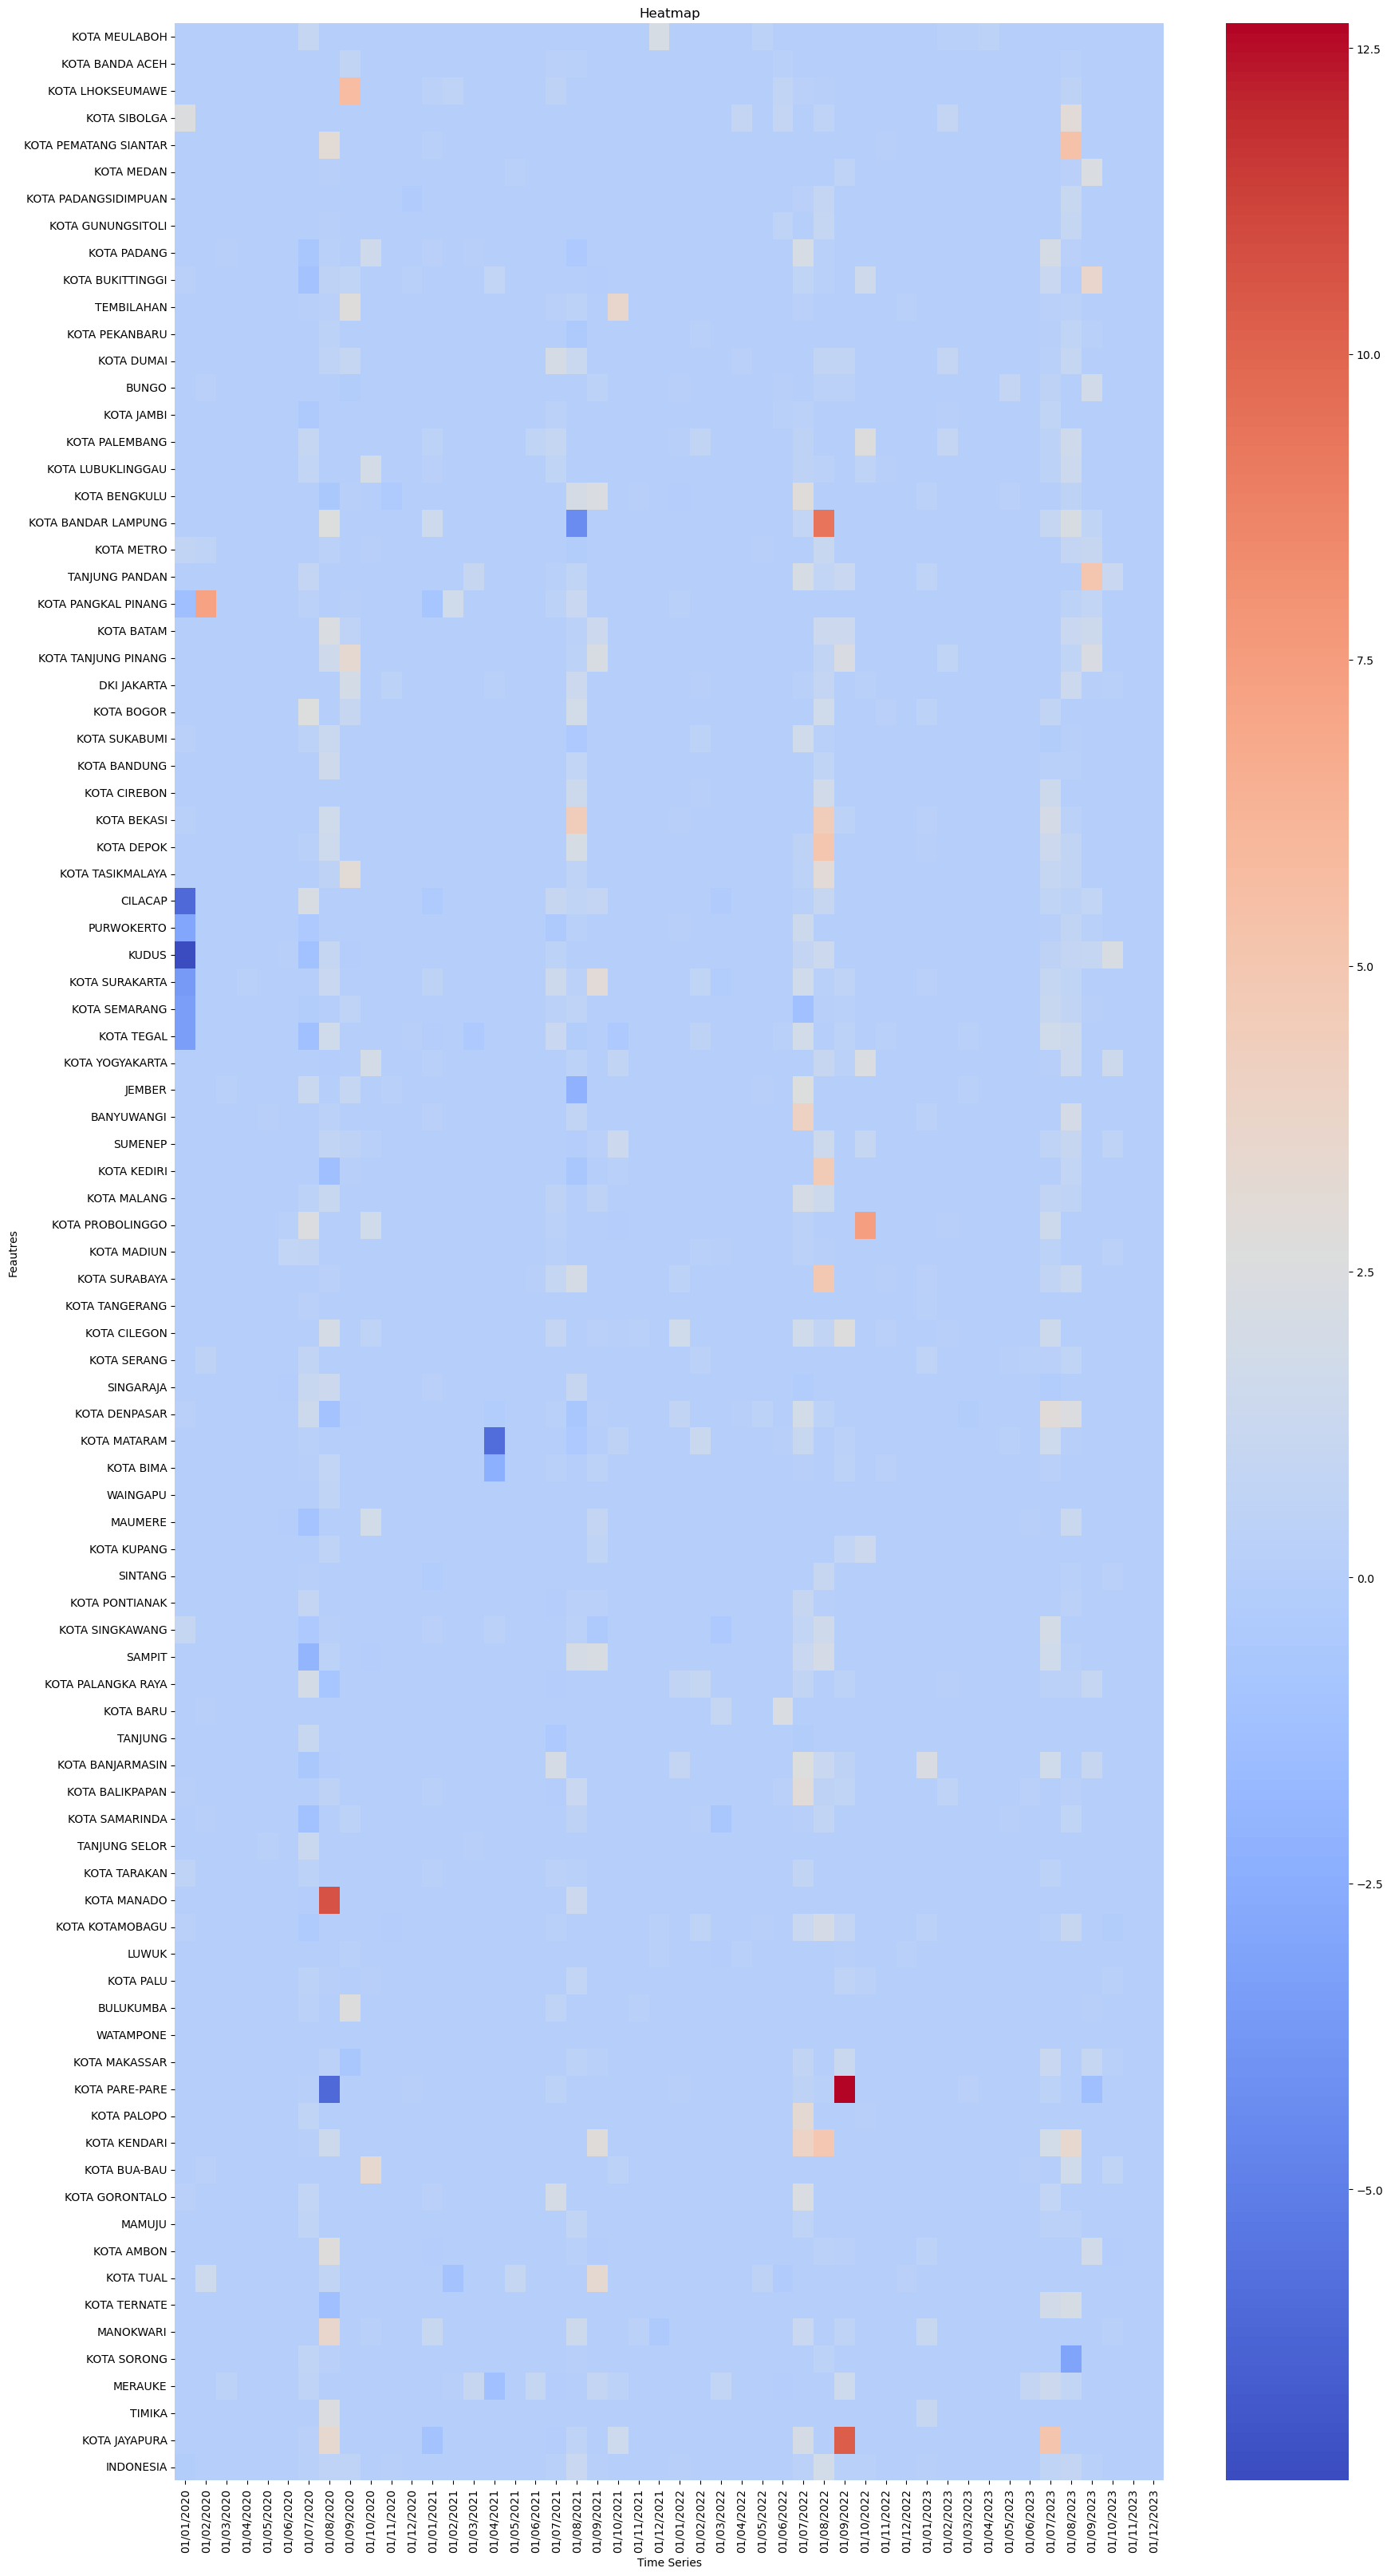

In [89]:
plt.figure(figsize=(20, 40))
sns.heatmap(df_ip_pendidikan, annot=False, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap')
plt.xlabel('Time Series')
plt.ylabel('Feautres')
plt.show()


### SPLIT TRAINING DATA

In [93]:
df = df_ip_pendidikan.reset_index()

In [94]:
df.head(91)

,index,Kota,01/01/2020,01/02/2020,01/03/2020,01/04/2020,01/05/2020,01/06/2020,01/07/2020,01/08/2020,...,01/03/2023,01/04/2023,01/05/2023,01/06/2023,01/07/2023,01/08/2023,01/09/2023,01/10/2023,01/11/2023,01/12/2023
0,0,KOTA MEULABOH,0.00,0.00,0.00,0.0,0.0,0.0,1.01,0.00,...,0.15,0.4,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
1,1,KOTA BANDA ACEH,0.03,0.00,0.00,0.0,0.0,0.0,0.00,0.00,...,0.00,0.0,0.00,0.00,0.00,0.22,0.00,0.00,0.0,0.0
2,2,KOTA LHOKSEUMAWE,0.00,0.00,0.00,0.0,0.0,0.0,0.07,0.00,...,0.00,0.0,0.00,0.00,0.00,0.52,0.00,0.00,0.0,0.0
3,3,KOTA SIBOLGA,2.58,0.00,0.00,0.0,0.0,0.0,0.00,0.00,...,0.00,0.0,0.00,0.00,0.00,2.98,0.00,0.00,0.0,0.0
4,4,KOTA PEMATANG SIANTAR,0.00,0.00,0.00,0.0,0.0,0.0,0.00,3.12,...,0.00,0.0,0.00,0.00,0.00,5.33,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,86,KOTA SORONG,0.00,0.00,0.00,0.0,0.0,0.0,0.68,0.23,...,0.00,0.0,0.00,0.00,0.00,-3.04,0.00,0.00,0.0,0.0
87,87,MERAUKE,0.00,0.00,0.45,0.0,0.0,0.0,0.58,0.00,...,0.00,0.0,0.00,0.87,1.37,0.81,0.00,0.00,0.0,0.0
88,88,TIMIKA,0.00,0.00,0.00,0.0,0.0,0.0,0.00,2.49,...,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
89,89,KOTA JAYAPURA,0.00,0.00,0.00,0.0,0.0,0.0,0.27,3.44,...,0.00,0.0,0.00,0.00,5.18,0.00,0.00,0.00,0.0,0.0


In [194]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer


X = df.drop(columns=["Kota", "index"], axis=1)
Y = df["Kota"]
# print(X)
numeric_features = X.select_dtypes(include=['float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()

y_encoded = label_encoder.fit_transform(Y)

# Random state sangat mempengaruhi hasil akhir, menggunakan 42 karena default parameter
X_train, X_test, Y_train, Y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)




In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer


X = df.drop(columns=["Kota", "index"], axis=1)
Y = df["Kota"]
# print(X)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(Y)

# Random state sangat mempengaruhi hasil akhir, menggunakan 42 karena default parameter
X_train, X_test, Y_train, Y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)




In [190]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, Y_train)


RandomForestRegressor(random_state=42)

In [191]:
Y_pred = rf_model.predict(X_test)

In [198]:
mse = mean_squared_error(Y_test, Y_pred) * 0.01
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred) * -1

# Tampilkan hasil
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R2 Score: {r2}')

Mean Squared Error (MSE): 8.906898578947368
Mean Absolute Error (MAE): 25.496315789473684
R2 Score: 0.16312540225145056


In [150]:
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler, OneHotEncoder
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# X = df.drop('Kota', axis=1)
# y = df['Kota']

# # Train-test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Define transformers for numeric and categorical columns
# numeric_features = X.select_dtypes(include=['float64']).columns
# categorical_features = X.select_dtypes(include=['object']).columns

# numeric_transformer = StandardScaler()
# categorical_transformer = OneHotEncoder()

# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numeric_transformer, numeric_features),
#         ('cat', categorical_transformer, categorical_features)
#     ])

# # Create a pipeline with the preprocessor and the linear regression model
# pipeline = Pipeline(steps=[('preprocessor', preprocessor),('regressor', LinearRegression())])

# from sklearn.preprocessing import StandardScaler

# # Exclude non-numeric columns
# numeric_columns = X_train.select_dtypes(include=['float64']).columns
# X_train_numeric = X_train[numeric_columns]
# X_test_numeric = X_test[numeric_columns]

# # Standardize only the numeric columns
# sc = StandardScaler()
# X_train_scaled = sc.fit_transform(X_train_numeric)
# X_test_scaled = sc.transform(X_test_numeric)

# from sklearn.preprocessing import LabelEncoder

# label_encoder = LabelEncoder()
# y_train_encoder = label_encoder.fit_transform(y_train)
# y_test_encoder = label_encoder.fit_transform(y_test)

# # Fit the model
# pipeline.fit(X_train, y_train_encoder)

# # Make predictions
# predict = pipeline.predict(X_test)

# # Evaluate the model
# mse = mean_squared_error(y_test_encoder, predict)
# mae = mean_absolute_error(y_test_encoder, predict)
# r2 = r2_score(y_test_encoder, predict)

# print(f'Mean Squared Error: {mse}')
# print(f'Mean Absolute Error: {mae}')
# print(f'R-squared: {r2}')

In [172]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

ValueError: could not convert string to float: 'KOTA BANJARMASIN'

In [137]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
Y_train_encoder = label_encoder.fit_transform(Y_train)
Y_test_encoder = label_encoder.fit_transform(Y_test)

from sklearn.linear_model import LinearRegression
# from sklearn.ensemble import RandomForestRegressor

# model1 = RandomForestRegressor()
# model1.fit(X_train, Y_train_encoder)

model = LinearRegression()
model.fit(X_train, Y_train_encoder)

LinearRegression()

In [138]:
predict = model.predict(X_test)

In [142]:
Y_test1 = label_encoder.inverse_transform(Y_test)

ValueError: y contains previously unseen labels: ['BANYUWANGI' 'JEMBER' 'KOTA BANDAR LAMPUNG' 'KOTA BARU' 'KOTA BATAM'
 'KOTA CIREBON' 'KOTA DUMAI' 'KOTA KOTAMOBAGU' 'KOTA MEULABOH'
 'KOTA PEMATANG SIANTAR' 'KOTA PROBOLINGGO' 'KOTA SAMARINDA' 'KOTA SERANG'
 'KOTA SUKABUMI' 'KOTA SURAKARTA' 'MANOKWARI' 'MAUMERE' 'TEMBILAHAN'
 'TIMIKA']

In [135]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mse = mean_squared_error(Y_test, predict)
mae = mean_absolute_error(Y_test, predict)
r2 = r2_score(Y_test, predict)
df_mean = df["price"].mean()

print(f"MSE : {mse}")
print(f"MAE : {mae}")
print(f"R2 Score : {r2}")
print(f"Mean: {df_mean}")

ValueError: could not convert string to float: 'BANYUWANGI'